# PD制御の応答

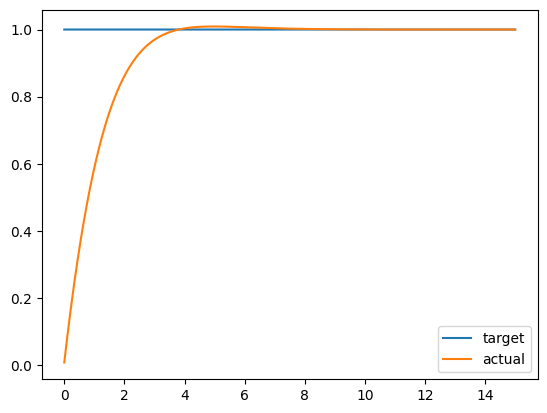

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 制御定数
Kp = 1 # 比例ゲイン
Kd = 1 # 微分ゲイン

dt = 10e-3 # 制御周期(100Hz = 10ms)
t = np.arange(0, 15, dt)
target = np.full_like(t, 1) # 目標値

actual = np.zeros_like(t) # 制御量(変位)
velocity = np.zeros_like(t) # 速度
output = np.zeros_like(t) # 操作量
error = np.zeros_like(t) # 偏差

actual[0] = 0 # 初期値
for i in range(len(t)):
  error[i] = target[i] - actual[i-1]
  output[i] = error[i] * Kp + (error[i] - error[i-1]) * Kd / dt
  velocity[i] = velocity[i-1] + (output[i] - velocity[i-1]) / 128
  actual[i] = actual[i-1] + velocity[i] * dt

plt.plot(t, target, label='target')
plt.plot(t, actual, label='actual')
plt.legend()

plt.show()